# Overview of the Developmental Immune cell atlas

In here I will highlight the different compartments of the Developmental Immune cell atlas, for visualisation purposes only, as the DEG analyses are done in each specific compartment (HSC progenitors, Myeloid, Lymphoid and Erythro-Megakaryocytes). I will subset the dataset as in the compartment notebooks, therefore removing cell types reported as cycling, doublets or low quality. 


In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=150, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
#tmpfile = 'h5ad_files/Progenitors_lineage_wilcox_tmp.h5ad'

In [4]:
alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results/cell_lines/"
alpha_vals = pd.read_csv(alpha_dir + "abcmk_inference_alpha_top_500_orthologs.txt", sep="\t")

In [5]:
adata = sc.read_h5ad('/mnt/storage/Github/Immune_Adaptation_Atlas/h5ad_files/PAN.A01.v01.raw_count.20210429.HSC_IMMUNE.embedding.h5ad')
#adata = sc.read_h5ad('../h5ad_files/PAN.A01.v01.raw_count.20210429.HSC_IMMUNE.embedding.h5ad')
adata

AnnData object with n_obs × n_vars = 593203 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
    uns: 'leiden', 'scvi', 'umap'
    obsm: 'X_scvi', 'X_umap'
    obsp: 'scvi_connectivities', 'scvi_distances'

In [6]:
adata.obs["celltype"] = adata.obs["anno_lvl_2_final_clean"].str.replace(r"[()]","").astype('category')


/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
adata.obs["anno_lvl_2_final_clean"].cat.categories

Index(['ABT(ENTRY)', 'AS_DC', 'B1', 'CD4+T', 'CD8+T', 'CD8AA', 'CMP',
       'CYCLING_B', 'CYCLING_DC', 'CYCLING_ILC', 'CYCLING_MEMP', 'CYCLING_MPP',
       'CYCLING_NK', 'CYCLING_PDC', 'CYCLING_T', 'CYCLING_YS_ERY', 'DC1',
       'DC2', 'DC_PROGENITOR', 'DN(P)_T', 'DN(Q)_T', 'DN(early)_T', 'DOUBLET',
       'DOUBLETS_FIBRO_ERY', 'DOUBLET_ERY_B', 'DOUBLET_LYMPHOID_MACROPHAGE',
       'DOUBLET_VSMC_ERYTHROCYTE', 'DP(P)_T', 'DP(Q)_T', 'EARLY_ERY',
       'EARLY_MK', 'EOSINOPHIL_BASOPHIL', 'FIBROBLAST_XVII', 'GMP',
       'HIGH_MITO', 'HSC_MPP', 'ILC2', 'ILC3', 'IMMATURE_B',
       'LANGERHANS_CELLS', 'LARGE_PRE_B', 'LATE_ERY', 'LATE_MK', 'LATE_PRO_B',
       'LMPP_MLP', 'LOW_QUALITY_MACROPHAGE', 'LOW_QUALITY_MID_ERY_(HIGH_RIBO)',
       'LOW_Q_INCONSISTENT', 'MACROPHAGE_ERY', 'MACROPHAGE_IRON_RECYCLING',
       'MACROPHAGE_KUPFFER_LIKE', 'MACROPHAGE_LYVE1_HIGH',
       'MACROPHAGE_MHCII_HIGH', 'MACROPHAGE_PROLIFERATING', 'MACROPHAGE_TREM2',
       'MAST_CELL', 'MATURE_B', 'MEMP', 'MEP', 

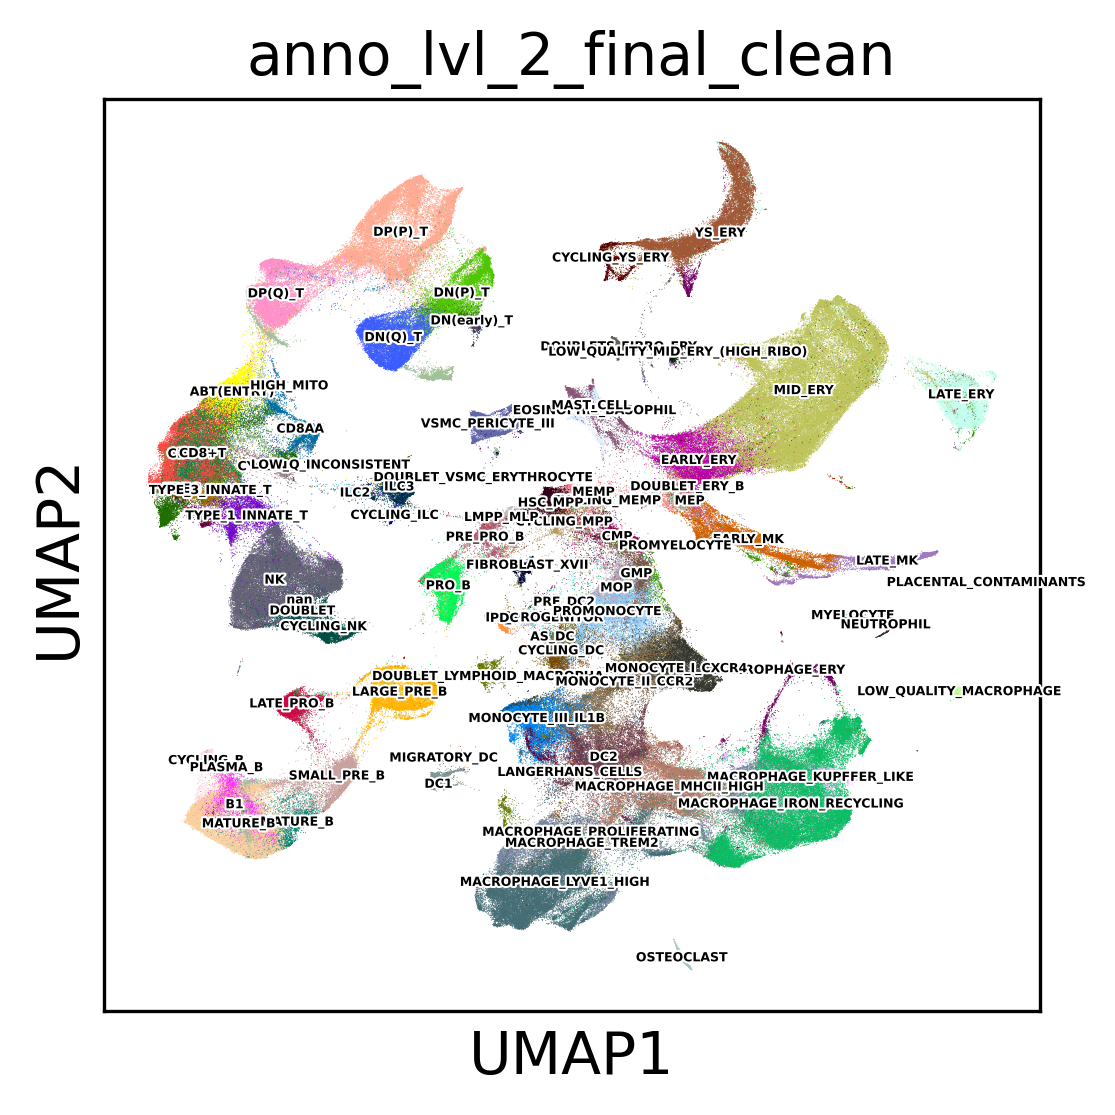

In [8]:
sc.pl.umap(adata, color=["anno_lvl_2_final_clean"],
           legend_loc = 'on data',legend_fontoutline =1,
           legend_fontsize= 3 )

In [9]:
adata_subset = adata[adata.obs['anno_lvl_2_final_clean'].isin([
    ## Progenitors
    'HSC_MPP', 'LMPP_MLP','PRE_PRO_B','DN(early)_T','DN(P)_T',
    'MEMP','MEP', 'EARLY_MK','CMP','GMP','PROMONOCYTE','PROMYELOCYTE',
    ## Lymphoid
    'PRO_B', 'LATE_PRO_B','LARGE_PRE_B', 'SMALL_PRE_B', 'IMMATURE_B',
    'MATURE_B','B1','PLASMA_B','PRE_PRO_B','NK','DN(early)_T','DN(Q)_T',
    'DN(P)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','ILC2','ILC3','CD4+T',
    'CD8+T','TREG','TYPE_1_INNATE_T', 'TYPE_3_INNATE_T','CD8AA',
    ## Myeloid
    'CMP','GMP','PROMYELOCYTE','MYELOCYTE','NEUTROPHIL','MOP',
    'PROMONOCYTE','MONOCYTE_I_CXCR4','MONOCYTE_II_CCR2',
    'MONOCYTE_III_IL1B','DC_PROGENITOR','PDC','AS_DC','PRE_DC2','DC2',
    'DC1','MIGRATORY_DC','LANGERHANS_CELLS','EOSINOPHIL_BASOPHIL',
    'MAST_CELL','MACROPHAGE_LYVE1_HIGH','MACROPHAGE_IRON_RECYCLING',
    'MACROPHAGE_MHCII_HIGH','MACROPHAGE_KUPFFER_LIKE','MACROPHAGE_TREM2',
    'OSTEOCLAST',
    ## MegaK Ery
    'MEMP','MEP','EARLY_ERY','MID_ERY','LATE_ERY','YS_ERY','EARLY_MK',
    'LATE_MK','VSMC_PERICYTE_III','MACROPHAGE_ERY'
    ])]

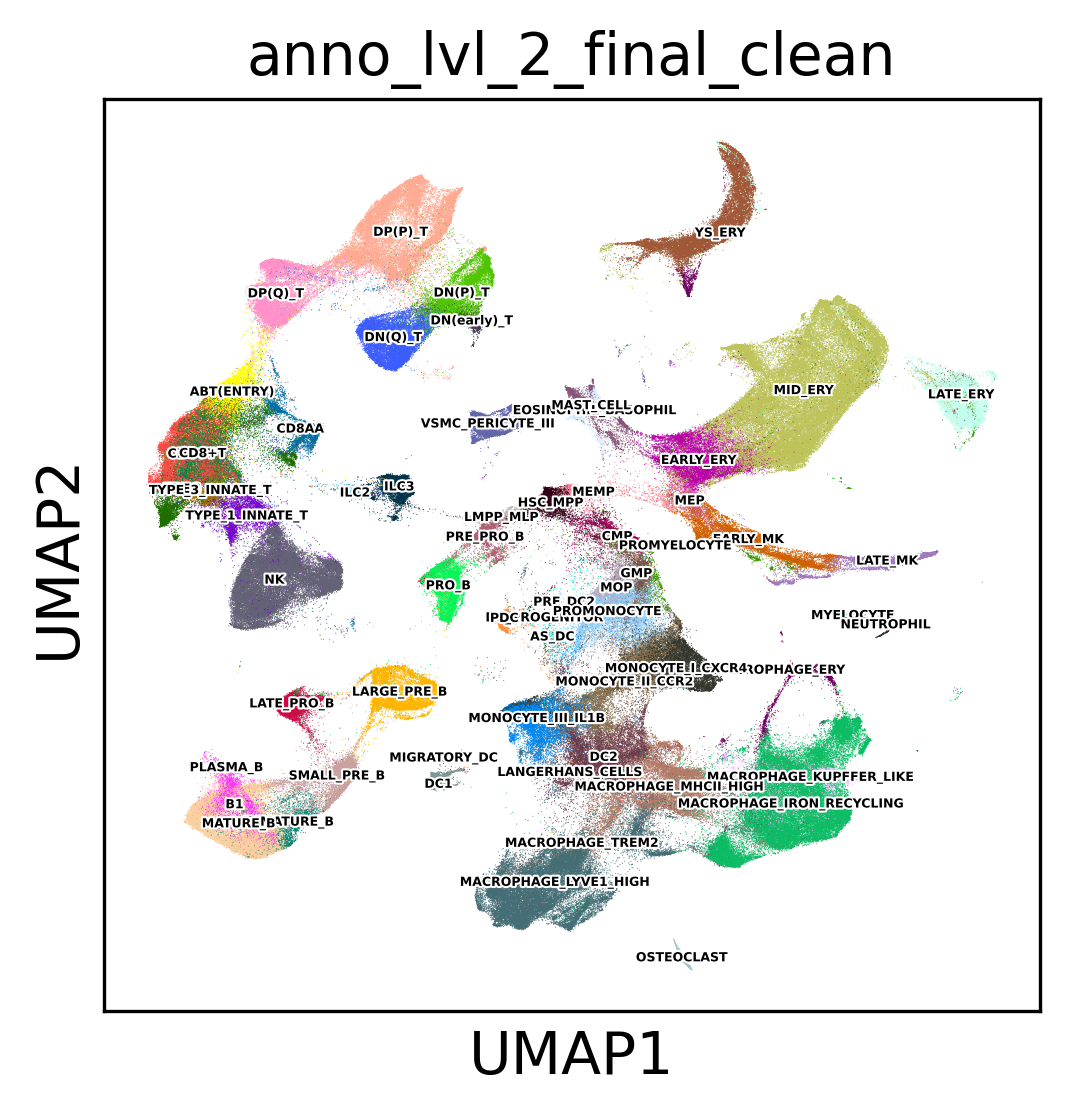

In [10]:
sc.pl.umap(adata_subset, color=["anno_lvl_2_final_clean"],
           legend_loc = 'on data',legend_fontoutline =1,
           legend_fontsize= 3 )

In [11]:
adata = adata_subset
del(adata_subset)

## Main compartment annotation

In [17]:
anno_lineage = {
    ## Progenitors
    'HSC_MPP' : "Progenitors",
    'LMPP_MLP' : "Progenitors",
    'PRE_PRO_B' : "Progenitors",
    'DN(early)_T' : "Progenitors",
    'DN(P)_T' : "Progenitors",
    'MEMP' : "Progenitors",
    'MEP' : "Progenitors",
    'EARLY_MK' : "Progenitors",
    'CMP' : "Progenitors",
    'GMP'  : "Progenitors",
    'PROMONOCYTE'  : "Progenitors",
    'PROMYELOCYTE' : "Progenitors",
    ## Lymphoid
    'PRO_B' : "Lymphoid",
    'LATE_PRO_B' : "Lymphoid",
    'LARGE_PRE_B' : "Lymphoid",
    'SMALL_PRE_B' : "Lymphoid",
    'IMMATURE_B' : "Lymphoid",
    'MATURE_B' : "Lymphoid",
    'B1' : "Lymphoid",
    'PLASMA_B' : "Lymphoid",
#    'PRE_PRO_B' : "Lymphoid",
    'NK' : "Lymphoid",
#    'DN(early)_T' : "Lymphoid",
    'DN(Q)_T' : "Lymphoid",
#    'DN(P)_T' : "Lymphoid",
    'DP(P)_T' : "Lymphoid",
    'DP(Q)_T' : "Lymphoid",
    'ABT(ENTRY)' : "Lymphoid",
    'ILC2' : "Lymphoid",
    'ILC3' : "Lymphoid",
    'CD4+T' : "Lymphoid",
    'CD8+T' : "Lymphoid",
    'TREG' : "Lymphoid",
    'TYPE_1_INNATE_T' : "Lymphoid",
    'TYPE_3_INNATE_T' : "Lymphoid",
    'CD8AA': "Lymphoid",
    ## Myeloid
#    'CMP': "Myeloid",
#    'GMP': "Myeloid",
#    'PROMYELOCYTE': "Myeloid",
    'MYELOCYTE': "Myeloid",
    'NEUTROPHIL': "Myeloid",
    'MOP': "Myeloid",
#    'PROMONOCYTE': "Myeloid",
    'MONOCYTE_I_CXCR4': "Myeloid",
    'MONOCYTE_II_CCR2': "Myeloid",
    'MONOCYTE_III_IL1B': "Myeloid",
    'DC_PROGENITOR' : "Myeloid",
    'PDC': "Myeloid",
    'AS_DC': "Myeloid",
    'PRE_DC2': "Myeloid",
    'DC2': "Myeloid",
    'DC1': "Myeloid",
    'MIGRATORY_DC': "Myeloid",
    'LANGERHANS_CELLS': "Myeloid",
    'EOSINOPHIL_BASOPHIL': "Myeloid",
    'MAST_CELL': "Myeloid",
    'MACROPHAGE_LYVE1_HIGH': "Myeloid",
    'MACROPHAGE_IRON_RECYCLING': "Myeloid",
    'MACROPHAGE_MHCII_HIGH': "Myeloid",
    'MACROPHAGE_KUPFFER_LIKE': "Myeloid",
    'MACROPHAGE_TREM2': "Myeloid",
    'OSTEOCLAST': "Myeloid",
    ## MegaK Ery
#    'MEMP' : 'MegaK/Ery',
#    'MEP': 'MegaK/Ery',
    'EARLY_ERY': 'MegaK/Ery',
    'MID_ERY': 'MegaK/Ery',
    'LATE_ERY': 'MegaK/Ery',
    'YS_ERY': 'MegaK/Ery',
#    'EARLY_MK': 'MegaK/Ery',
    'LATE_MK': 'MegaK/Ery',
    'VSMC_PERICYTE_III': 'MegaK/Ery',
    'MACROPHAGE_ERY': 'MegaK/Ery'
}

In [18]:
adata.obs['Lineage'] = adata.obs['anno_lvl_2_final_clean']
adata.obs['Lineage'] = (
    adata.obs["anno_lvl_2_final_clean"]
    .map(anno_lineage)
.astype('category')
)

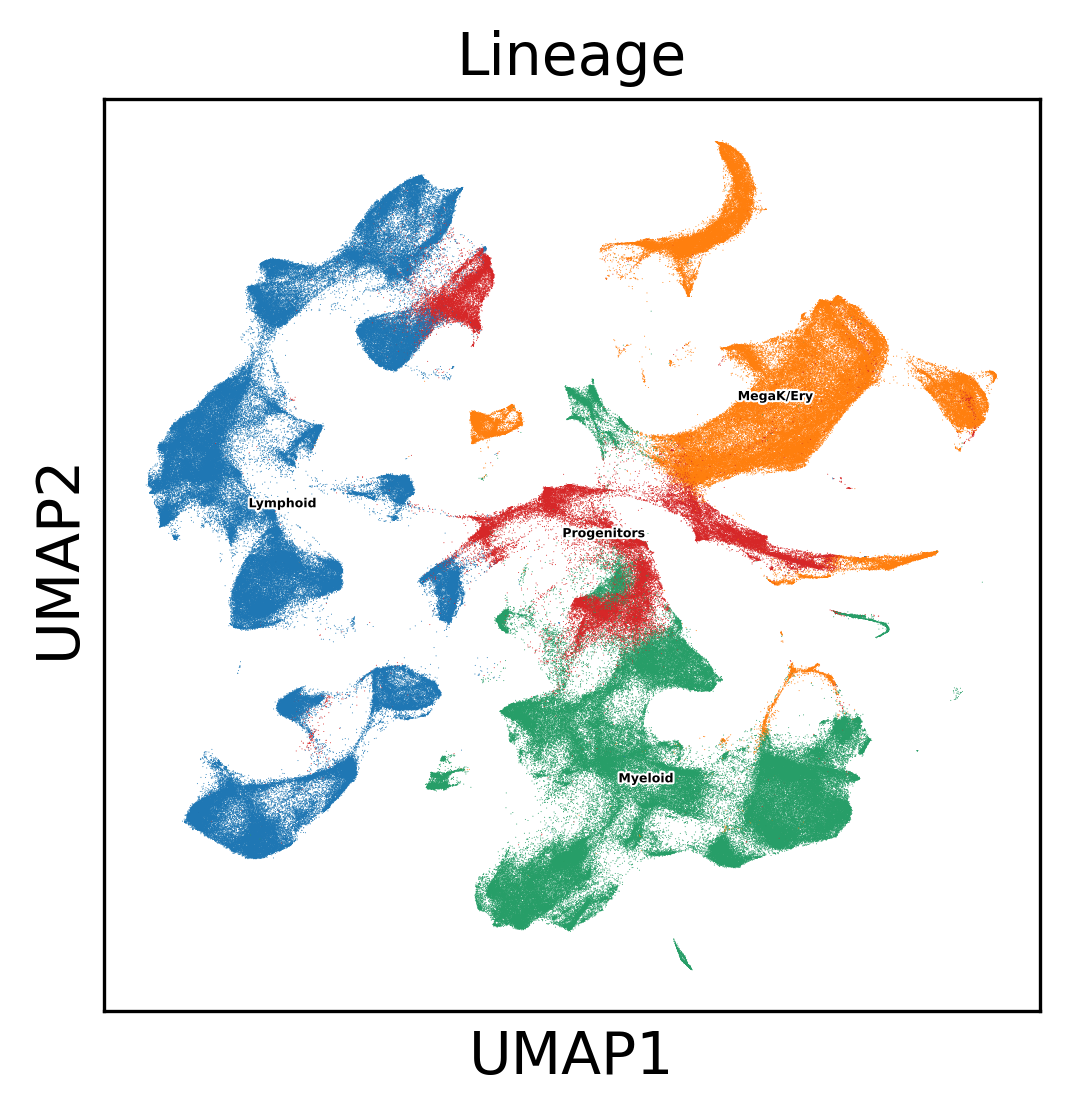

In [19]:
sc.pl.umap(adata, color=["Lineage"],
           legend_loc = 'on data',legend_fontoutline =1,
           legend_fontsize= 3 )

In [20]:
adata.X.max()

21842.0

In [21]:
adata.raw

In [23]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=10e4)
sc.pp.log1p(adata)

In [24]:
sc.settings.verbosity = 4
sc.pp.highly_variable_genes(adata, min_mean=0.3, max_mean=5)

extracting highly variable genes
    finished (0:00:20)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


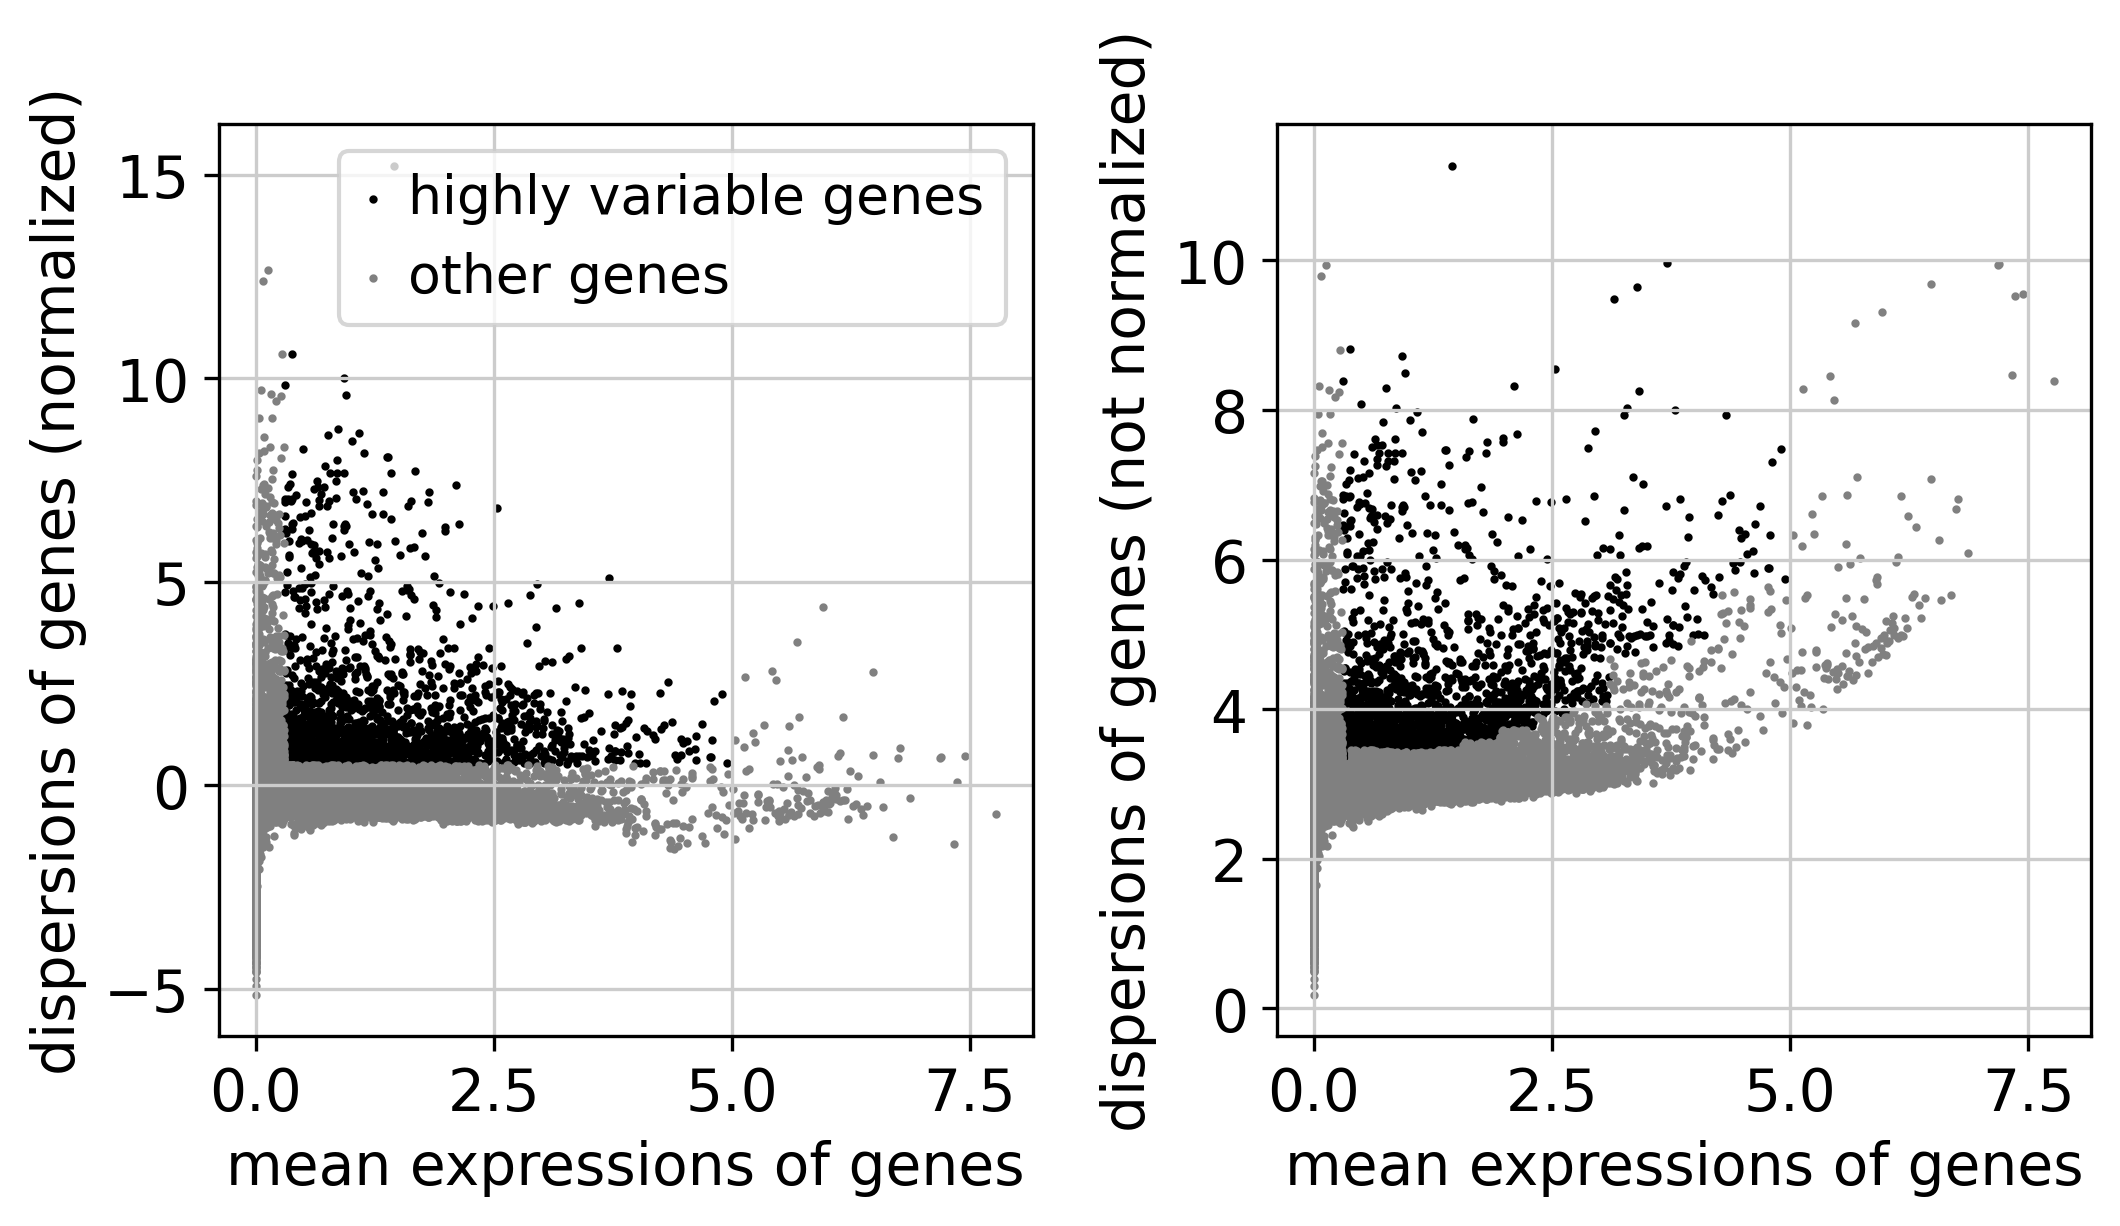

In [25]:
sc.pl.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:04)


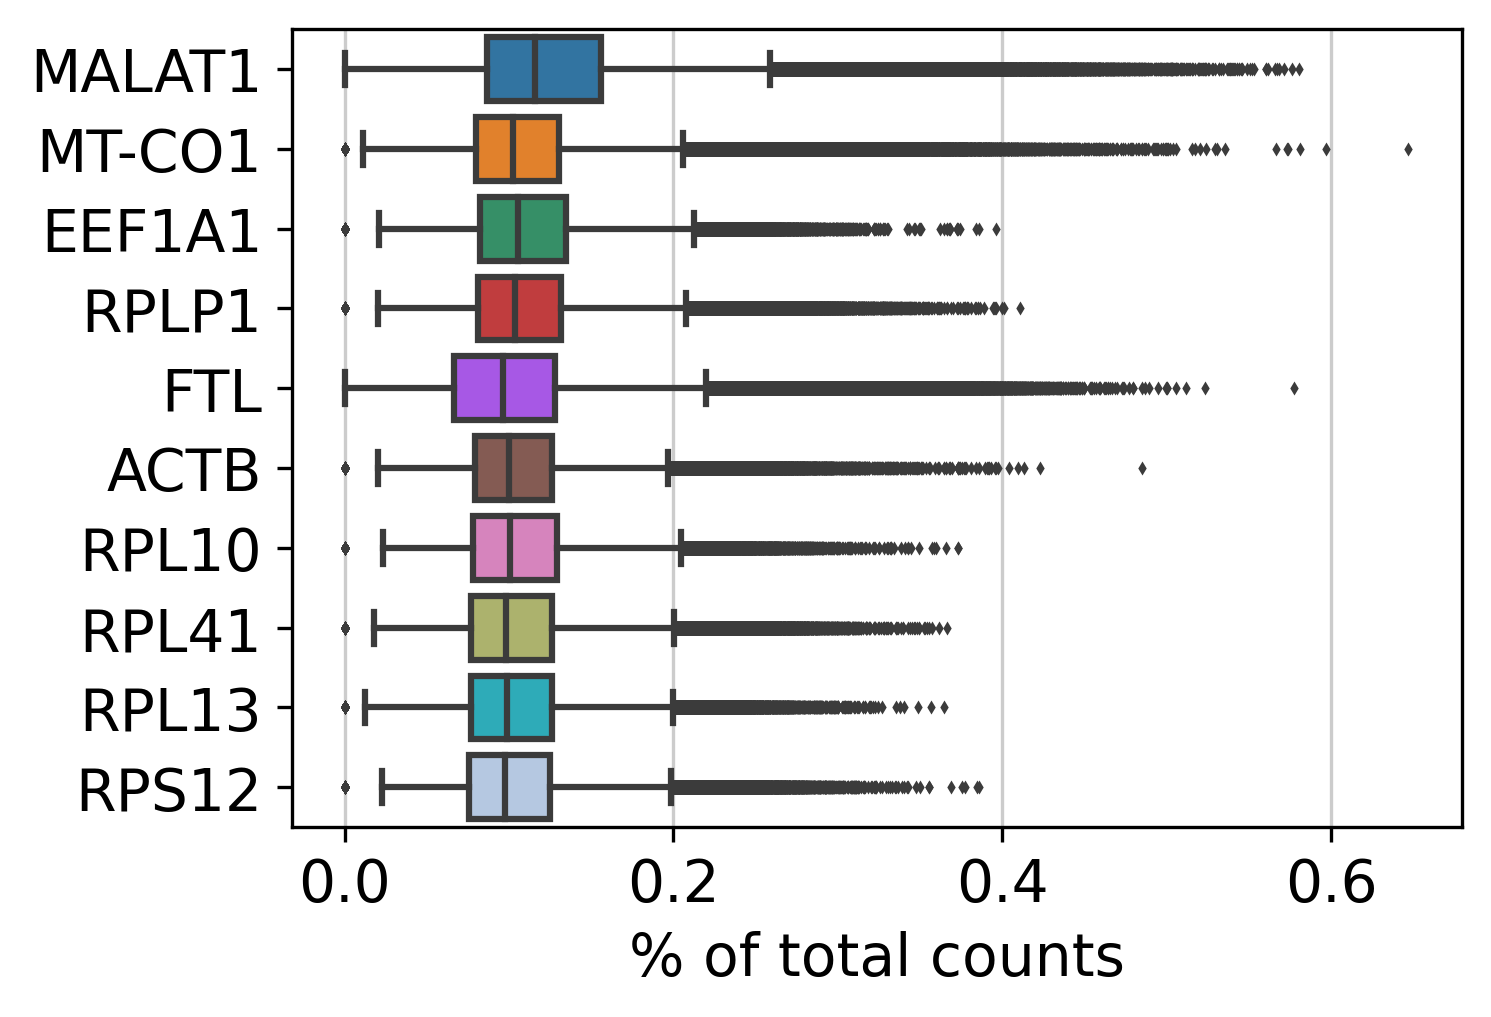

In [26]:
sc.pl.highest_expr_genes(adata, n_top=10, show=True)

ranking genes
    consider 'Lineage' groups:
    with sizes: [195071 113454 167388  53076]
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:55:17)


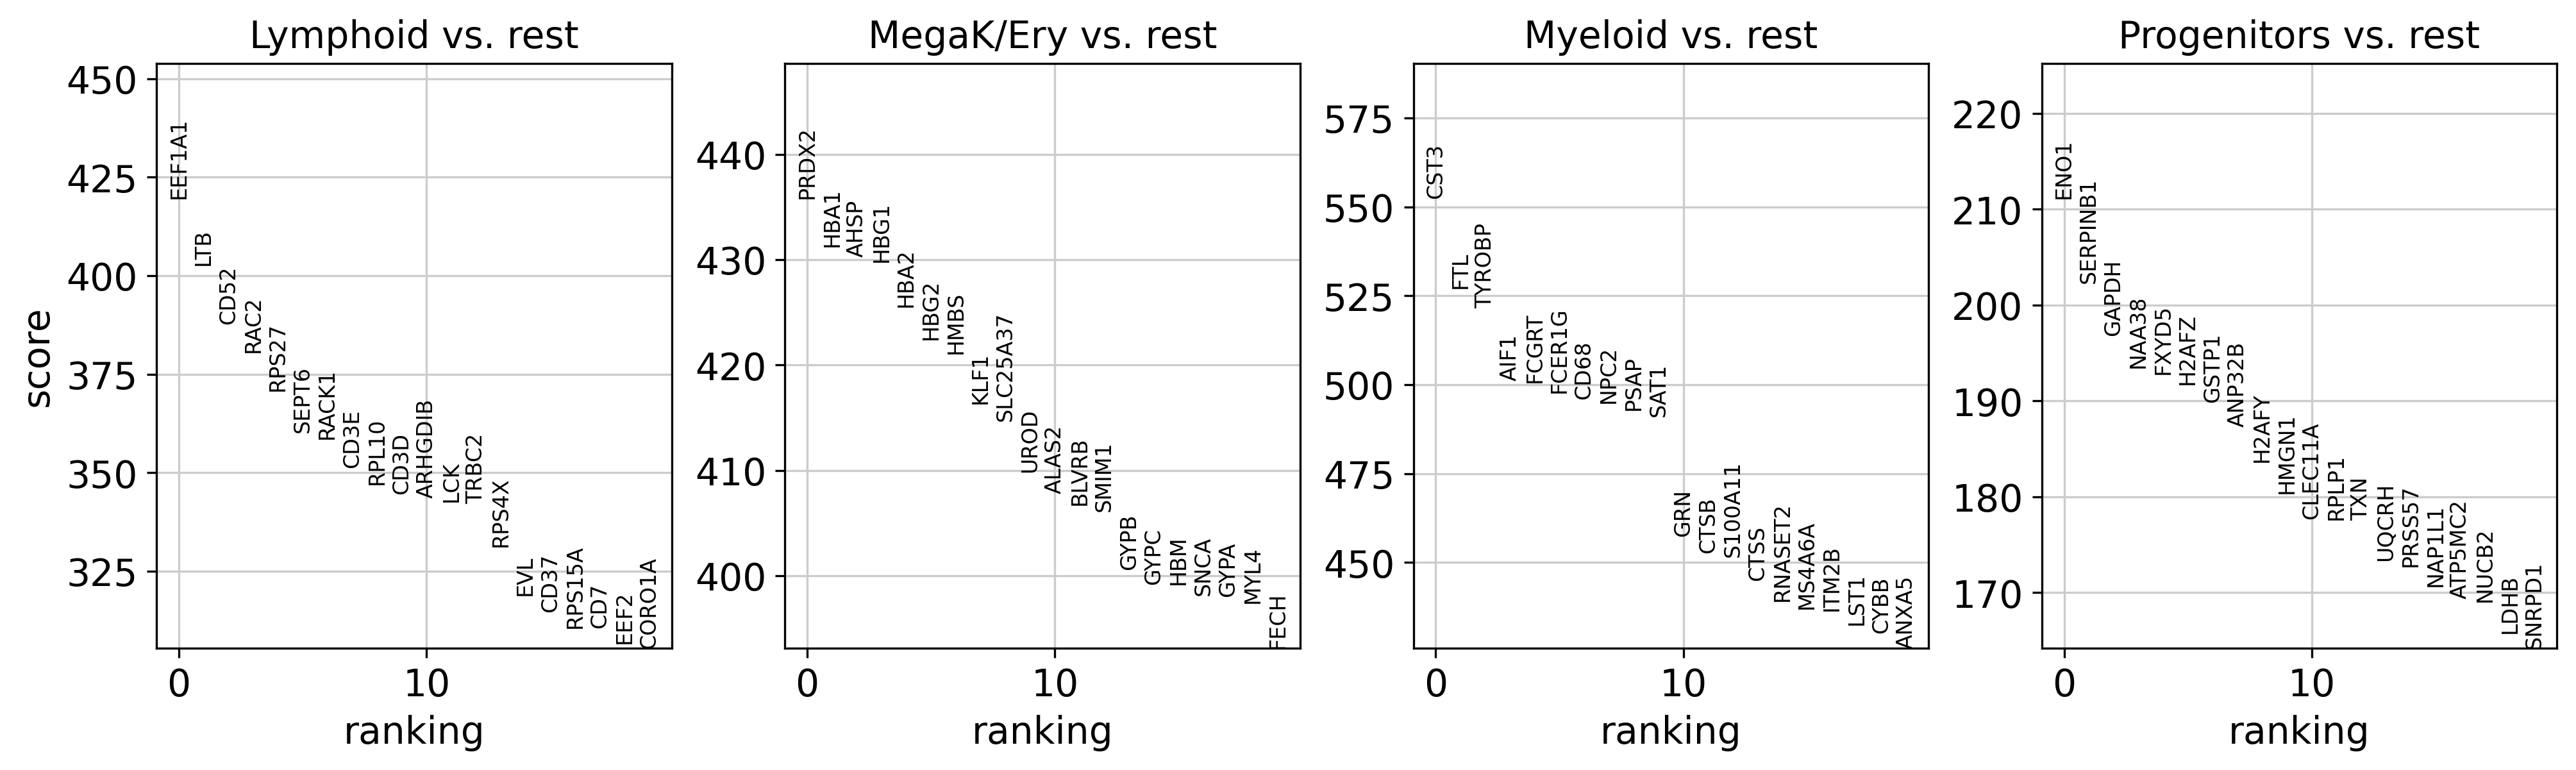

In [27]:
sc.tl.rank_genes_groups(adata, groupby= 'Lineage', method='wilcoxon', key_added= "wilcoxon")
sc.pl.rank_genes_groups(adata,  n_genes=20,  sharey=False, key= "wilcoxon")

In [28]:
Subtypes = adata.obs['Lineage'].unique()
Markers = [[]]*len(Subtypes)

for i in range(0,len(Subtypes)):
    print(i, Subtypes[i])
    m = sc.get.rank_genes_groups_df(adata, group=Subtypes[i],
                                    key='wilcoxon', pval_cutoff=0.0001,
                                    log2fc_min=1)
    m = m.sort_values("logfoldchanges", ascending=False)
    m.reset_index(drop=True, inplace=True)
    Markers[i] = m

0 MegaK/Ery
1 Myeloid
2 Lymphoid
3 Progenitors


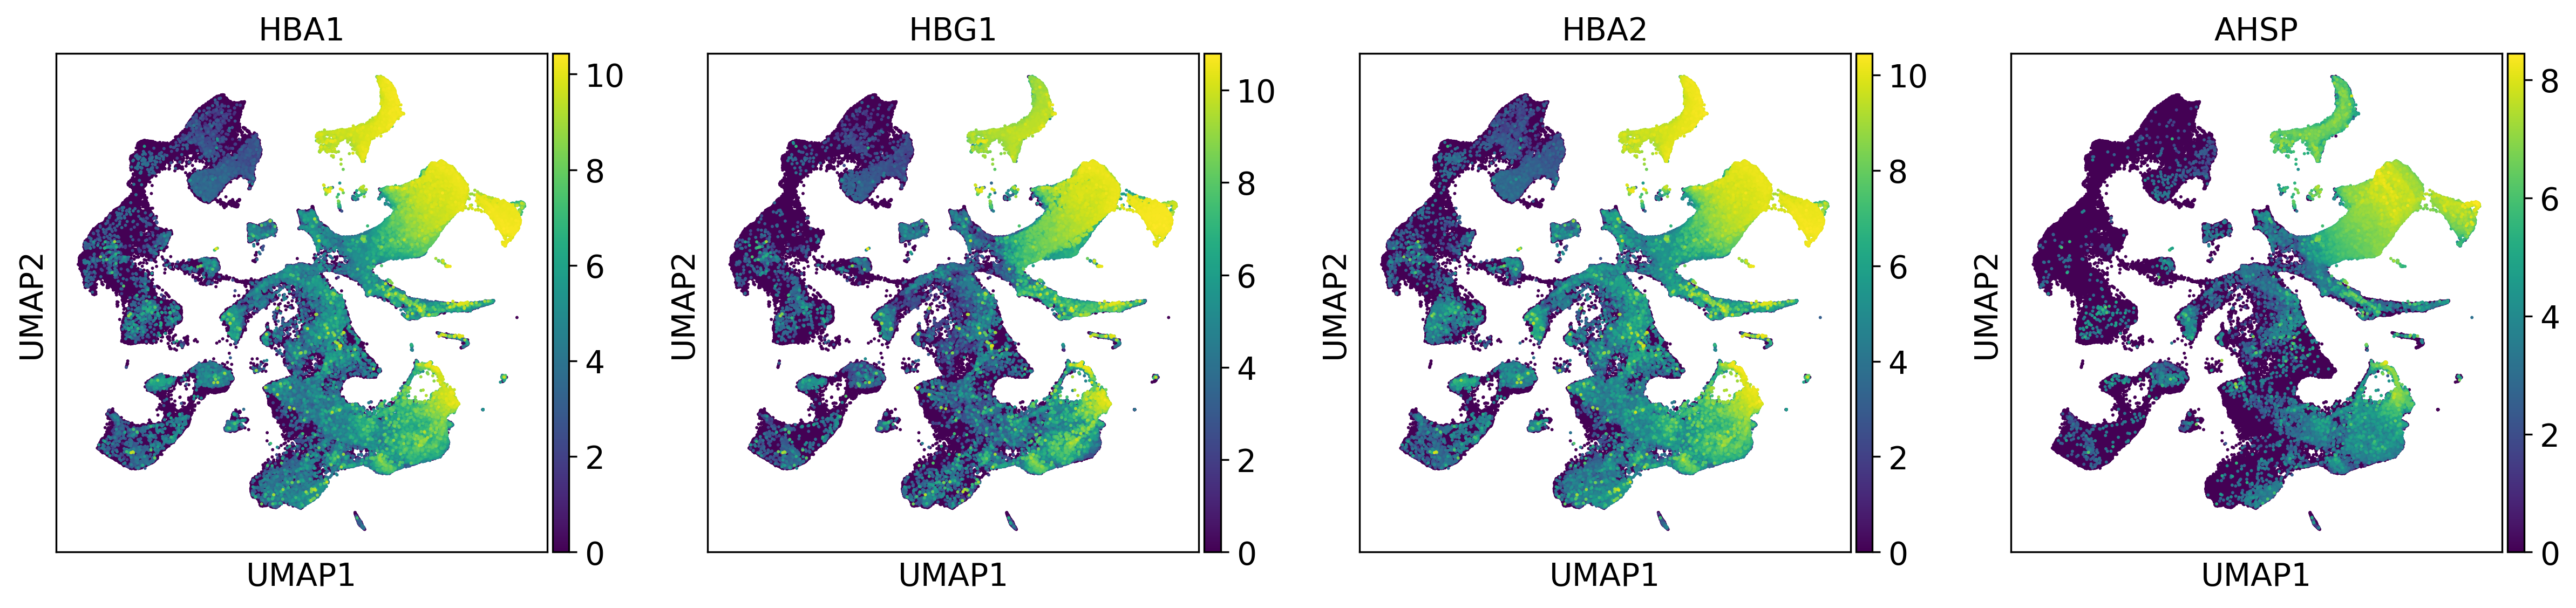

In [29]:
sc.pl.umap(adata, color= Markers[0]["names"][0:4], size=8 ) # top

In [30]:
#pip install upsetplot
from upsetplot import from_contents
from upsetplot import UpSet

In [31]:
CompleteDict_markers =  {}

for i in range(0,len(Subtypes)):
    CompleteDict_markers[Subtypes[i]] = Markers[i]['names']


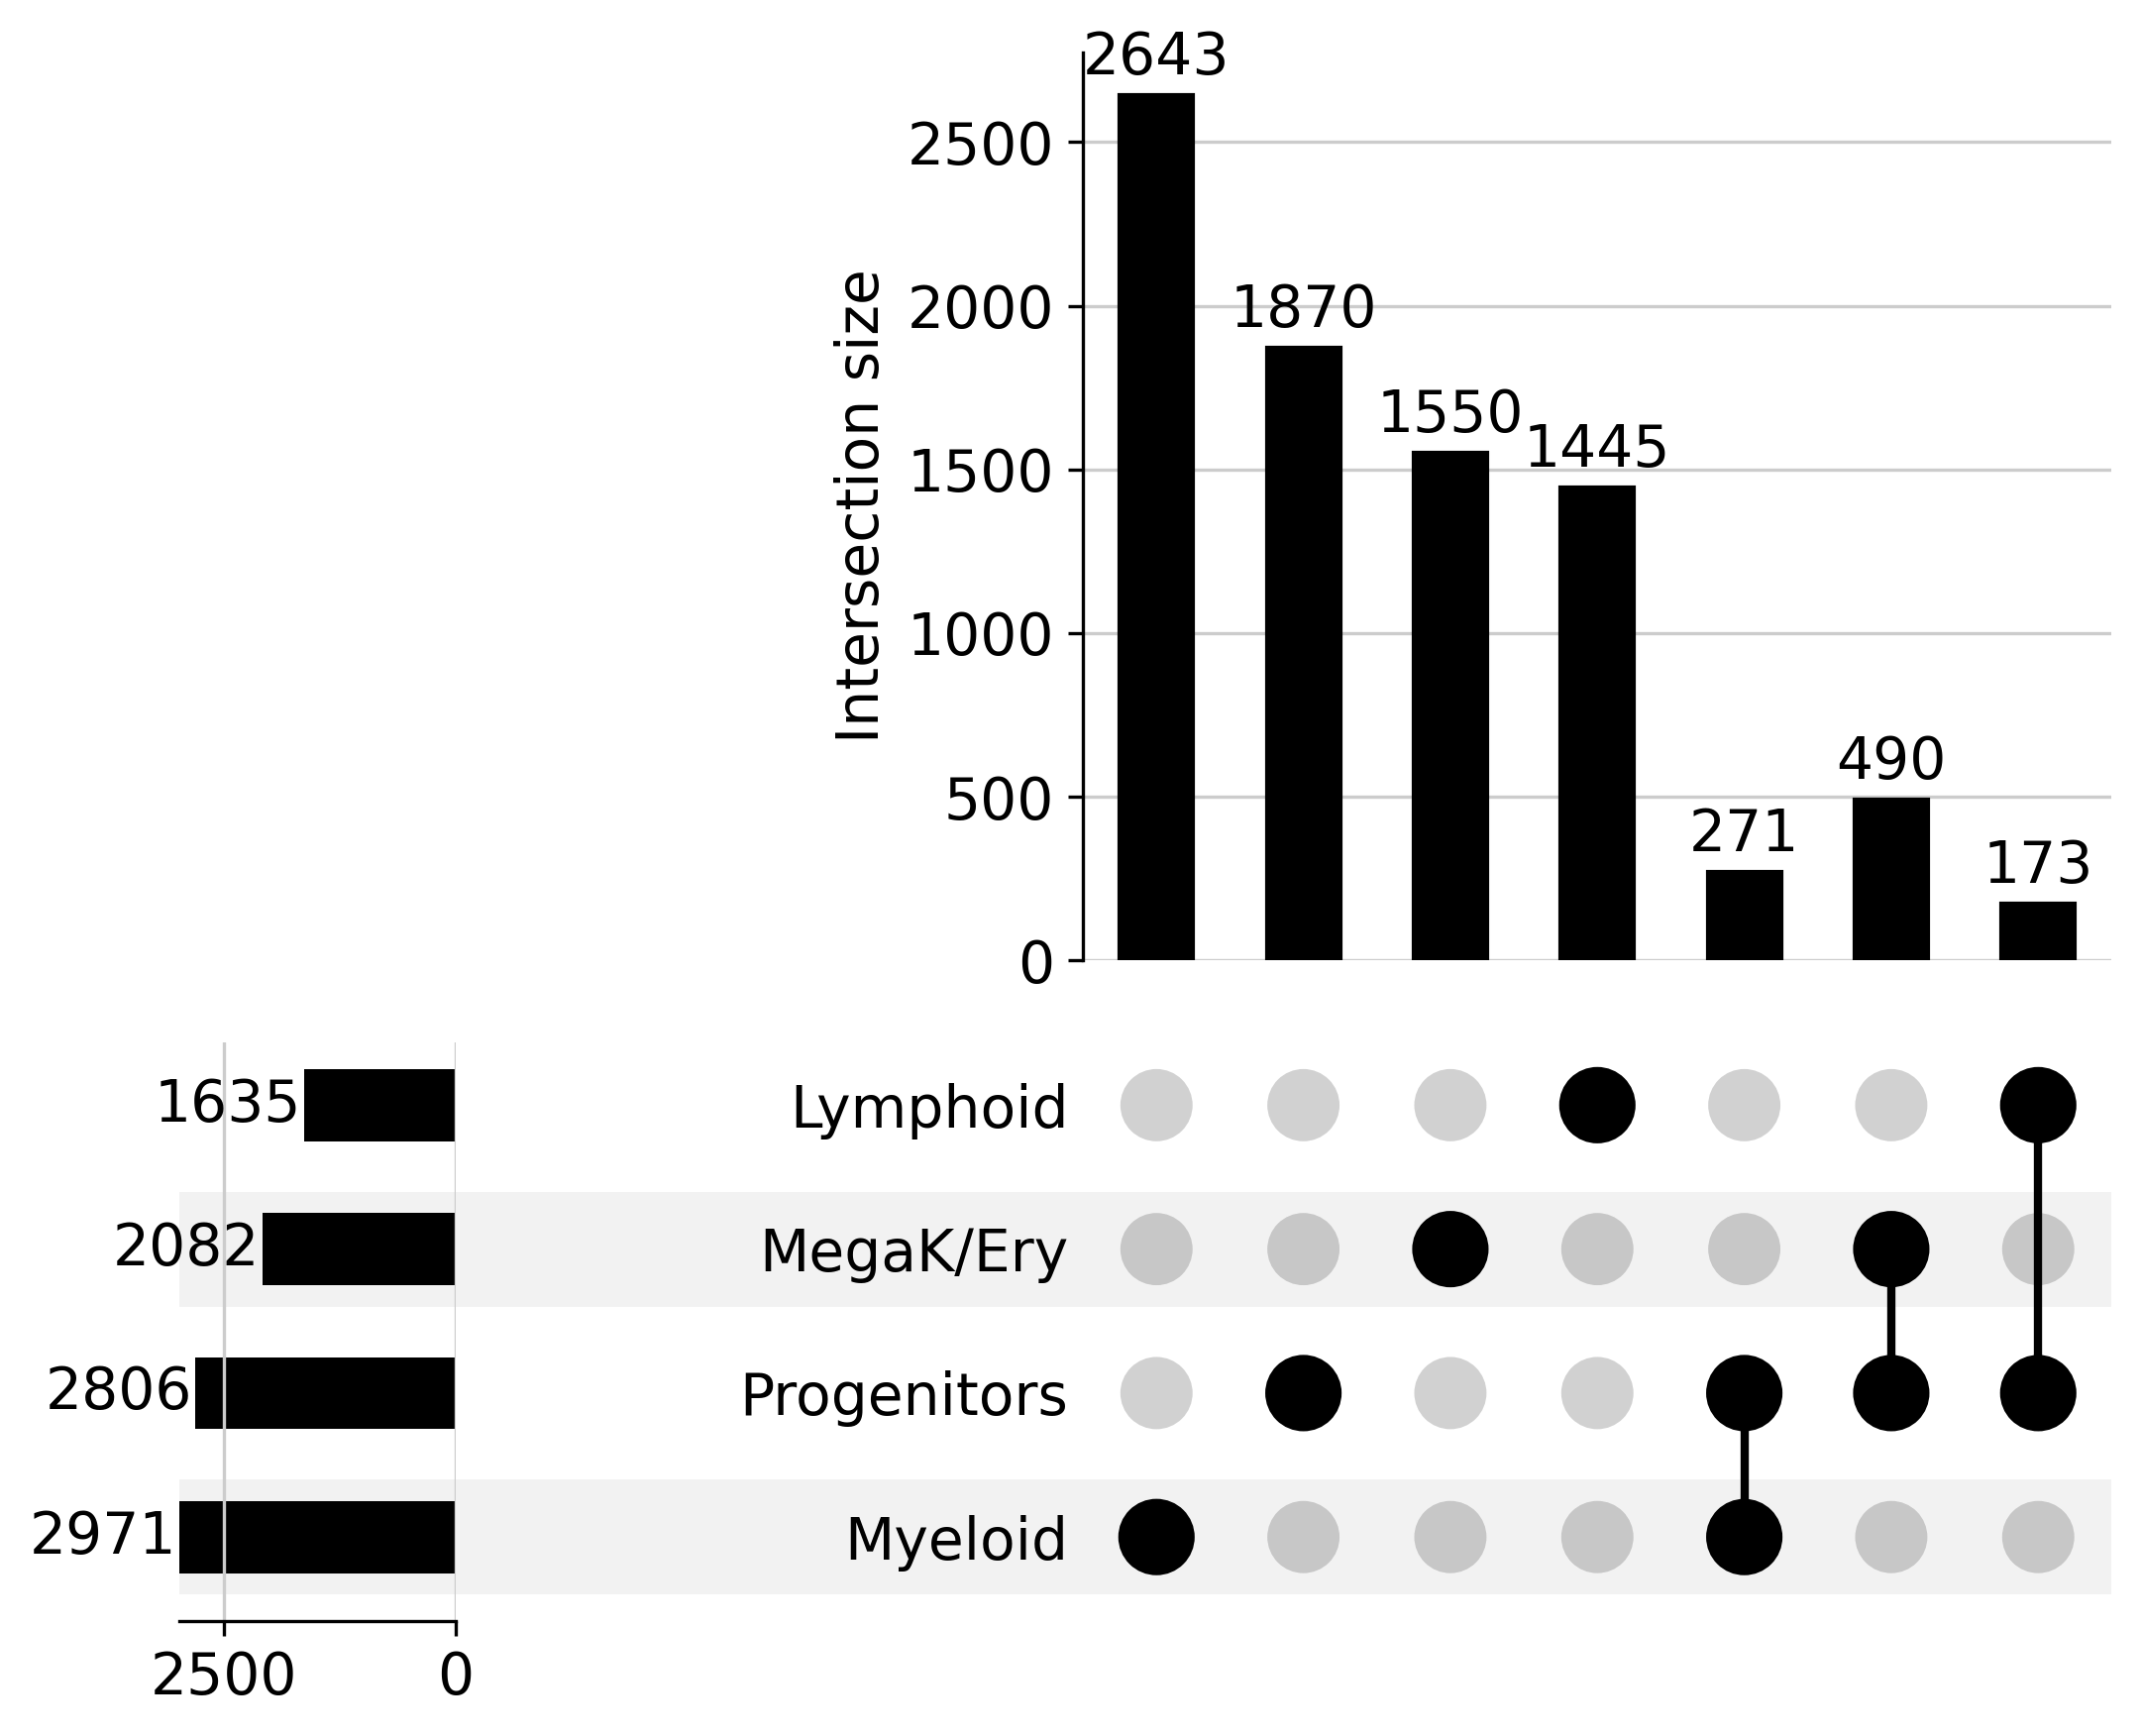

In [32]:
plt = UpSet(from_contents(CompleteDict_markers),
            min_subset_size=50, subset_size='count',
            element_size=50,  show_counts=True).plot()

In [48]:
full_csv_path = '/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/Developmental/ENS_FULL_genelists_wilcox/Compartments/full.csv'

(pd.DataFrame.from_dict(data=CompleteDict_markers, orient='index')
   .to_csv(full_csv_path, header=False))

In [34]:
%load_ext rpy2.ipython

In [38]:
%%R -i full_csv_path
library("EnsDb.Hsapiens.v86")
library(stringr)

print(full_csv_path)
mycsv <- read.csv(full_csv_path, row.names = 1,header = F, na.strings = "")

[1] "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/Developmental/ENS_FULL_genelists_wilcox/Compartments/full.csv"


In [50]:
%%R -i full_csv_path
library("EnsDb.Hsapiens.v86")
library(stringr)

path <- "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/Developmental/ENS_FULL_genelists_wilcox/Compartments/"

mycsv <- read.csv(full_csv_path, row.names = 1,header = F, na.strings = "")

for (i in 1:nrow(mycsv))
{
    genelist <- row.names(mycsv)[i]
    n <- sum(!is.na(mycsv[i,]))
    #print(paste0(n," genes"))
    
    goi <- as.character(mycsv[i,1:n])
    print(goi[1:5])

    f <- str_remove_all(genelist, "[()]")
    f <- str_replace(f, "[/]", "_")

    print(f)
    ens_df <- ensembldb::select(EnsDb.Hsapiens.v86, keys= goi, 
                              keytype = "SYMBOL", 
                              columns = c("SYMBOL","GENEID"))
   
    ens_df <- ens_df$GENEID[grepl(pattern = "^ENS", x = ens_df$GENEID)]
    #print(head(ens_df)) 

    write(x = ens_df, file = paste0(path, f ,"_FULL_ENSEMBL.txt"),ncolumns = 1)

}


[1] "HBA1" "HBG1" "HBA2" "AHSP" "HBM" 
[1] "MegaK_Ery"
[1] "C1QC"  "C1QA"  "C1QB"  "FOLR2" "CD163"
[1] "Myeloid"
[1] "TRAV26-1" "TRAV16"   "TRAV2"    "TRAV12-1" "TRAV8-2" 
[1] "Lymphoid"
[1] "AC005009.1" "BAALC-AS2"  "MPO"        "NKAIN2"     "CCDC175"   
[1] "Progenitors"
